# Movie Prediction Analysis

## Pre Load Package

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pre Load Data

'video_id' is defined as the index of each sample. 'cvt_per_day' is the metric, the rest of 14 columns are all characteristic features (numerical & categorical) of each video.

In [2]:
TV = pd.read_table('TVdata.txt', sep = ',', header = 0, lineterminator = '\n')
TV.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.606,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.500,112.301,51,other award,PG-13,1.710
1,300175,270338.426,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.500,94.983,41,no award,R,3.250
2,361899,256165.867,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.300,115.764,58,other award,R,2.647
3,308314,196622.721,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.600,130.704,94,Oscar,R,1.667
4,307201,159841.652,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.400,105.546,37,other award,R,3.067


In [3]:
print('Number of columns: '+ str(TV.shape[0]))
print('Number of rows: '+ str(TV.shape[1]))

Number of columns: 4226
Number of rows: 16


## Part 1: Data Exploration

## 1.1 Exclude errorneous data

In [4]:
# check duplicated entry
if len(TV.set_index('video_id').index.get_duplicates()) == 0:
    print ('There is no duplicated entry (video id based).')

There is no duplicated entry (video id based).


## 1.2 Understand the numerical features

### 1.2.1 Overview

Note: video_id and release_year are not numerical features, althrough they are represented by numbers.

In [5]:
TV.drop(['video_id', 'release_year'], axis = 1).describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.9])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000,4226.000
mean,4218.630,7.783,28.104,6462.924,2150743.439,2536338.472,5.257,89.556,15.974,0.955
std,13036.080,6.134,11.864,31596.007,7176604.483,8243516.266,2.123,21.086,26.205,0.955
min,2.188,1.000,1.000,0.000,0.000,0.000,0.000,4.037,0.000,0.000
10%,141.985,3.000,13.000,8.000,0.000,0.000,2.300,62.391,0.000,0.000
25%,351.169,4.000,20.000,81.000,0.000,0.000,4.300,82.602,0.000,0.000
50%,1193.500,6.000,28.000,535.000,0.000,0.000,5.800,90.730,0.000,1.000
75%,3356.789,9.000,36.000,3053.000,1500000.000,0.000,6.800,99.500,41.000,1.667
90%,7930.121,15.000,44.000,12180.500,5000000.000,8551228.000,7.500,111.034,57.000,2.250
max,307127.606,41.000,70.000,948630.000,107000000.000,184208848.000,10.000,246.017,100.000,4.000


In [6]:
print((TV==0).sum()) #count the number of 0 for each feature, which assume is the missing data
print(TV.dtypes) # check data type for each feature

video_id                            0
cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64
video_id                           int64
cvt_per_day                      float64
weighted_categorical_position      int64
weighted_horizontal_poition        int64
import_id                         object
release_year                       int64
genres                            object
imdb_votes                         int64
budget                             int64
boxoffice 

Among the 10 numerical features (not included video_id and release_year), 4 features have over 25% of missing data: budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

### 1.2.2 cvt_per_day

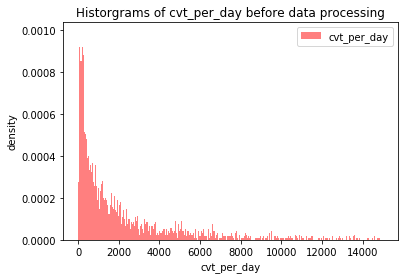

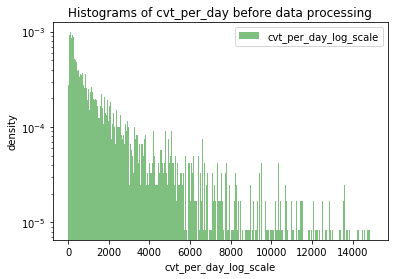

In [7]:
# cvt_per_day data explore
plt.hist(TV['cvt_per_day'].values, bins = range(0,15000,30), alpha = 0.5, color = 'r', label = 'cvt_per_day', normed = True)
plt.legend(loc ='upper right')
plt.title('Historgrams of cvt_per_day before data processing')
plt.xlabel('cvt_per_day')
plt.ylabel('density')
plt.show()

# log scale of y due to large variation
plt.hist(TV['cvt_per_day'].values, log = True, bins = range(0, 15000, 30), alpha = 0.5, color = 'g', label = 'cvt_per_day_log_scale', normed = True)
plt.legend(loc = 'upper right')
plt.title('Histograms of cvt_per_day before data processing')
plt.xlabel('cvt_per_day_log_scale')
plt.ylabel('density')
plt.show()

### 1.2.3 Correleation among numerical features 

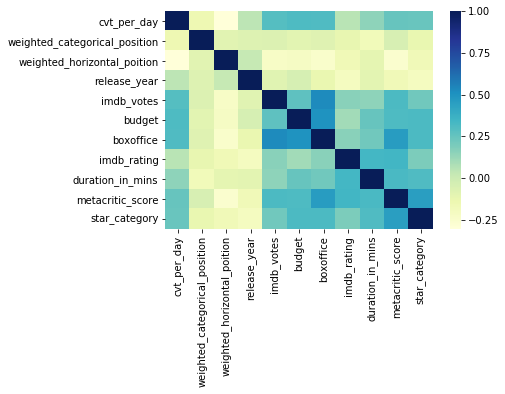

In [8]:
corr = TV[['cvt_per_day', 'weighted_categorical_position', 'weighted_horizontal_poition', 
            'release_year', 'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 
            'duration_in_mins', 'metacritic_score', 'mpaa', 'star_category']].corr()
sns.heatmap(corr, cmap = 'YlGnBu')

In [9]:
corr

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000,-0.148,-0.302,0.046,0.298,0.316,0.312,0.059,0.152,0.249,0.247
weighted_categorical_position,-0.148,1.000,-0.084,-0.069,-0.064,-0.090,-0.074,-0.116,-0.174,-0.044,-0.123
weighted_horizontal_poition,-0.302,-0.084,1.000,0.027,-0.221,-0.211,-0.245,-0.162,-0.102,-0.255,-0.168
release_year,0.046,-0.069,0.027,1.000,-0.083,-0.040,-0.128,-0.199,-0.097,-0.167,-0.198
imdb_votes,0.298,-0.064,-0.221,-0.083,1.000,0.273,0.531,0.163,0.156,0.322,0.225
budget,0.316,-0.090,-0.211,-0.040,0.273,1.000,0.505,0.106,0.251,0.315,0.322
boxoffice,0.312,-0.074,-0.245,-0.128,0.531,0.505,1.000,0.164,0.226,0.465,0.322
imdb_rating,0.059,-0.116,-0.162,-0.199,0.163,0.106,0.164,1.000,0.344,0.347,0.192
duration_in_mins,0.152,-0.174,-0.102,-0.097,0.156,0.251,0.226,0.344,1.000,0.327,0.309
metacritic_score,0.249,-0.044,-0.255,-0.167,0.322,0.315,0.465,0.347,0.327,1.000,0.452


## 1.3 Understand the categorical features

### 1.3.1 simple categorical features

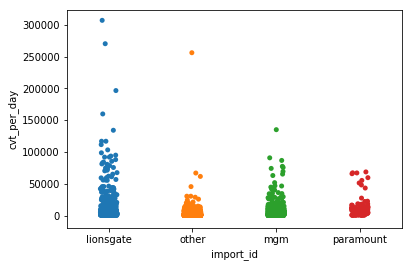

       index  import_id
0      other       2963
1  lionsgate        677
2        mgm        445
3  paramount        141


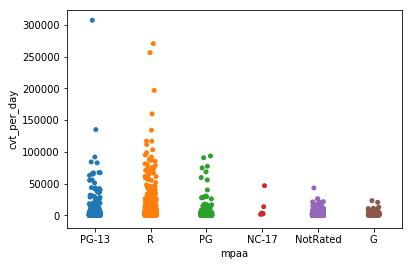

      index  mpaa
0  NotRated  2158
1         R  1158
2     PG-13   426
3        PG   353
4         G   125
5     NC-17     6


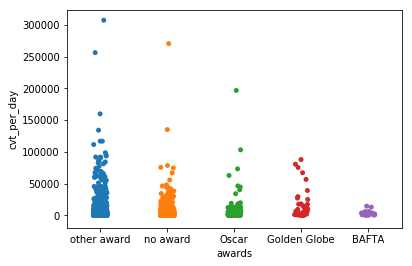

          index  awards
0      no award    2569
1   other award    1453
2         Oscar     141
3  Golden Globe      44
4         BAFTA      19


In [10]:
sns.stripplot(x = 'import_id', y = 'cvt_per_day', data = TV, jitter = True)
plt.show()
print(TV['import_id'].value_counts().reset_index())

sns.stripplot(x = 'mpaa', y = 'cvt_per_day', data = TV, jitter = True)
plt.show()
print(TV['mpaa'].value_counts().reset_index())

sns.stripplot(x = 'awards', y = 'cvt_per_day', data = TV, jitter = True)
plt.show()
print(TV['awards'].value_counts().reset_index())

### 1.3.2 Distribution of splited generes

Some videos have more than 1 genre, the genre of each video is splited, this would help emphasize the effect of each individual genre.

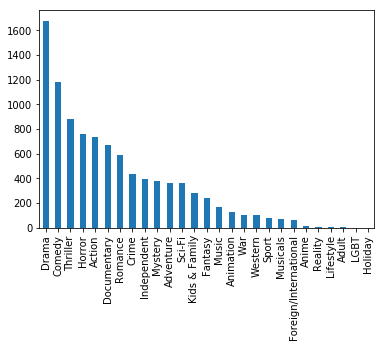

In [11]:
gen_split = TV['genres'].str.get_dummies(sep=',').sum().sort_values(ascending = False)
gen_split.plot.bar()

6 genres including Anime, Reality, Lifestyle, Adult, LGBT, Holiday have low frequencies. Therefore, during feature processng, they will be grouped together as: 'Misc_gen' in the feature 'genres'.

### 1.3.3 Distribution of release_year

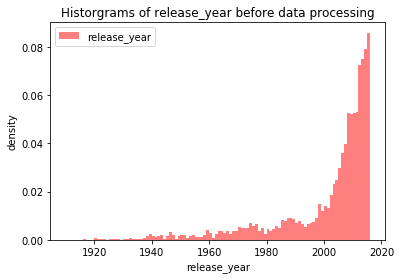

count   4226.000
mean    2001.057
std       17.497
min     1916.000
10%     1974.000
20%     1991.000
30%     2001.000
40%     2006.000
50%     2008.000
60%     2010.000
70%     2012.000
80%     2013.000
90%     2014.000
max     2017.000
Name: release_year, dtype: float64


In [12]:
plt.figure(1)
plt.hist(TV['release_year'].values, bins = range(1910, 2017, 1), alpha = 0.5, color = 'r',
         label = 'release_year', normed = True)
plt.legend(loc = 'upper left')
plt.title('Historgrams of release_year before data processing')
plt.xlabel('release_year')
plt.ylabel('density')
plt.show()

print(TV['release_year'].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

## Part 2. Feature Preprocessing

## 2.1 Categorical Feature
There are 5 categorical features: import_id, mpaa, awards, genres, and release_year. There is no missing data in them. They can be converted into dummy/indicators.

The first 3 have relatively small sub-types, they can be easily converted to dummies.

The 'genres' have 27 different sub-types, 6 of them are rarely observed (refer to previous section). It's reasonable to group these 6 into 1. Note: a video may have more than one genre, in the feature preprocessing, all genres are handled individually.

The release_year is bined into 10 buckets based on the year range between 1917 and 2017.

In [13]:
# Convert 3 categorical variables into dummy variables
d_import_id = pd.get_dummies(TV['import_id'])
d_mpaa = pd.get_dummies(TV['mpaa'])
d_awards = pd.get_dummies(TV['awards'])

In [14]:
# Convert 'genres' into dummy variables
d_genres = pd.DataFrame()
for genre in ['Action', 'Adult', 'Adventure', 'Animation', 'Anime', 'Comedy', 'Crime', 'Documentary', 'Drama'
          , 'Fantasy', 'Foreign/International', 'Holiday', 'Horror', 'Independent', 'Kids & Family', 'LGBT', 
          'Lifestyle', 'Music', 'Musicals','Mystery', 'Reality', 'Romance','Sci-Fi', 'Sport', 'Thriller', 'War', 
          'Western']:
    gen_lst = []
    for i in range(TV.shape[0]):
        if genre in TV['genres'][i]:
            gen_lst.append(1)
        else:
            gen_lst.append(0)
    d_genres[genre] = pd.Series(gen_lst).values
    
d_genres['Misc_gen'] = d_genres['Anime'] | d_genres['Reality'] | d_genres['Lifestyle'] | \
                       d_genres['Adult'] | d_genres['LGBT'] | d_genres['Holiday']
d_genres.drop(['Anime', 'Reality', 'Lifestyle', 'Adult', 'LGBT', 'Holiday'], axis = 1, 
              inplace = True)

In [15]:
# Bin release_year and convert into dummies
bin_year = [1916, 1974, 1991, 2001, 2006, 2008, 2010, 2012, 2013, 2014, 2017]
year_range = ['1916-1974', '1974-1991', '1991-2001', '2001-2006','2006-2008','2008-2010',
              '2010-2012','2012-2013','2013-2014','2014-2017']
year_bin = pd.cut(TV['release_year'], bin_year, labels = year_range)
d_year = pd.get_dummies(year_bin).astype(np.int64)

In [16]:
# New dataframe, drop the previous categorical features, add new dummy variables, check for null
TV_temp = TV.drop(['import_id', 'mpaa', 'awards', 'genres', 'release_year'], axis = 1)
newTV = pd.concat([TV_temp, d_import_id, d_mpaa, d_awards, d_genres, d_year], axis = 1)
print(newTV.shape)
print(pd.isnull(newTV).any(1).nonzero()[0])
print(newTV.head())
newTV_0 = newTV.copy() # a copy of newTV

(4226, 58)
[]
   video_id  cvt_per_day  weighted_categorical_position  \
0    385504   307127.606                              1   
1    300175   270338.426                              1   
2    361899   256165.867                              1   
3    308314   196622.721                              3   
4    307201   159841.652                              1   

   weighted_horizontal_poition  imdb_votes    budget  boxoffice  imdb_rating  \
0                            3       69614  15000000   42930462        6.500   
1                            3       46705  15000000    3301046        6.500   
2                            3      197596  26000000   37397291        7.300   
3                            4      356339  15000000   15700000        7.600   
4                            3       46720  27220000    8551228        6.400   

   duration_in_mins  metacritic_score  ...  1916-1974  1974-1991  1991-2001  \
0           112.301                51  ...          0          0       

Feature space holds 4226 observations and 58 features in total. 
There is NO NULL data. newTV_0 is kepted as the raw dataframe before any further feature processing, e.g. replace 0 with null, missing data fill, and ect. 

## 2.2 Handling of missing data
Among the 10 numerical features (not include video_id), 4 features have over 25% of missing values (shown as '0', which is not possible in reality): budget, boxoffice, metacritic_score, star_category. 2 features have less than 10% of missing data: imdb_votes, imdb_rating.

There are 3242 samples have at least one missing data.

In [17]:
# Mark zero values as NaN
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']] = \
newTV[['budget','boxoffice','metacritic_score', 'star_category','imdb_votes', 'imdb_rating']].replace(0, np.nan)

# count the number of Nan values in each columns
newTV.isnull().sum()

# count the number videos who have at least one missing data
print('videos having at least one null: ', newTV.isnull().any(axis = 1).sum())

videos having at least one null:  3242


### 2.2.1 Filling missing data with mean value
For imdb_voates and imdb_rating, they always show 'null' together, which is reasonable, since when a imdb_votes is missing, the imdb_rating is mostly also missing. For all 6 features with missiong data, the 1st attempt is to fill in with their mean value.

In [18]:
# fill missing value with the column mean
newTV_i1 = newTV.copy()
newTV_i1['budget'].fillna(newTV_i1['budget'].mean(), inplace = True)
newTV_i1['boxoffice'].fillna(newTV_i1['boxoffice'].mean(), inplace = True)
newTV_i1['metacritic_score'].fillna(newTV_i1['metacritic_score'].mean(), inplace =True)
newTV_i1['star_category'].fillna(newTV_i1['star_category'].mean(), inplace = True)
newTV_i1['imdb_votes'].fillna(newTV_i1['imdb_votes'].mean(), inplace = True)
newTV_i1['imdb_rating'].fillna(newTV_i1['imdb_rating'].mean(), inplace =  True)

newTV_i1 have the feature processing as: fill the missing data in budget, boxoffice, metacritic_score, star_category, imdb_votes, imdb_rating with mean. It will be tested in the upcoming models. 

### 2.2.2 Filling missing data with median value
For imdb_voates and imdb_rating, they always show 'null' together, which is reasonable, since when a imdb_votes is missing, the imdb_rating is mostly also missing. For all 6 features with missiong data, the 1st attempt is to fill in with their mean value.

In [19]:
newTV_i2 = newTV.copy()
newTV_i2['budget'].fillna(newTV_i2['budget'].median(), inplace = True)
newTV_i2['boxoffice'].fillna(newTV_i2['boxoffice'].median(), inplace = True)
newTV_i2['metacritic_score'].fillna(newTV_i2['metacritic_score'].median(), inplace =True)
newTV_i2['star_category'].fillna(newTV_i2['star_category'].median(), inplace = True)
newTV_i2['imdb_votes'].fillna(newTV_i2['imdb_votes'].median(), inplace = True)
newTV_i2['imdb_rating'].fillna(newTV_i2['imdb_rating'].median(), inplace =  True)

newTV_i2 have the feature processing as: fill the missing data in budget, boxoffice, metacritic_score, star_category, imdb_votes, imdb_rating with median. It will be tested in the upcoming models. 

## 2.3 Feature scaling
The impact of different scaling methods on the model performance is small. In the following model training and selections, the standard scaling (sc) data is used. 

### 2.3.1 Standard Scaling with newTV_i1 dataset (which is replace the missing data with column *mean)

In [20]:
# Standard Scaling, (x-mean)/stdev
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_i1_sc = newTV_i1.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_i1_sc[scale_lst])
newTV_i1_sc[scale_lst] = sc_scale.transform(newTV_i1_sc[scale_lst])

newTV_i1_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.984,1.470,4.696,0.542,1.079,-0.630,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.258,1.470,-1.022,0.542,0.257,-1.997,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.043,3.108,3.898,1.100,1.243,0.327,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.470,0.767,1.309,1.952,5.250,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.258,3.290,-0.265,0.472,0.758,-2.544,...,0,0,0,0,0,0,0,1,0,0


### 2.3.2 Standard Scaling with newTV_i2 dataset (which is replace the missing data with column *median)

In [21]:
# Standard Scaling, (x-mean)/stdev
scale_lst = ['weighted_categorical_position', 'weighted_horizontal_poition', 'budget','boxoffice', 
             'imdb_votes','imdb_rating','duration_in_mins', 'metacritic_score','star_category']
newTV_i2_sc = newTV_i2.copy()

sc_scale = preprocessing.StandardScaler().fit(newTV_i2_sc[scale_lst])
newTV_i2_sc[scale_lst] = sc_scale.transform(newTV_i2_sc[scale_lst])

newTV_i2_sc.head()

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,...,1916-1974,1974-1991,1991-2001,2001-2006,2006-2008,2008-2010,2010-2012,2012-2013,2013-2014,2014-2017
0,385504,307127.606,-1.106,-2.116,1.998,1.724,4.865,0.532,1.079,-0.763,...,0,0,0,0,0,0,0,1,0,0
1,300175,270338.426,-1.106,-2.116,1.272,1.724,-0.817,0.532,0.257,-2.125,...,0,0,0,0,0,0,0,1,0,0
2,361899,256165.867,-1.106,-2.116,6.050,3.307,4.071,1.089,1.243,0.191,...,0,0,0,0,0,0,1,0,0,0
3,308314,196622.721,-0.780,-2.032,11.077,1.724,0.961,1.298,1.952,5.095,...,0,0,0,0,1,0,0,0,0,0
4,307201,159841.652,-1.106,-2.116,1.273,3.482,-0.064,0.462,0.758,-2.670,...,0,0,0,0,0,0,0,1,0,0


### 2.3.3 Min-max Scaling

In [22]:
# Min-max scalling, (x-min)/(mix-min)
newTV_i1_mm = newTV_i1.copy()

mm_scale = preprocessing.MinMaxScaler().fit(newTV_i1_mm[scale_lst])
newTV_i1_mm[scale_lst] = mm_scale.transform(newTV_i1_mm[scale_lst])

#newTV_i1_mm.head()

### 2.3.4 Robust Scaling

In [23]:
# Robust scaling, which is using the interquartile range, rather than min-max
# So that it is robust to outliers. (x-Q1)/(Q3-Q1)
newTV_i1_rs = newTV_i1.copy()

rs_scale = preprocessing.RobustScaler().fit(newTV_i1_rs[scale_lst])
newTV_i1_rs[scale_lst] = rs_scale.transform(newTV_i1_rs[scale_lst])

#newTV_i1_rs.head()

## Part 3: Model Training
85% of the samples will be used to train all the models, and 15% is reserved for testing the model in next section

In [24]:
from sklearn.model_selection import train_test_split
# The 15% test data will kept aside, they won't be seen by the models until final test/comparison.
model_train1, model_test1 = train_test_split(newTV_i1_sc, test_size = 0.15, random_state = 3)
model_train1_x = model_train1.drop(['video_id', 'cvt_per_day'], axis = 1)
model_test1_x = model_test1.drop(['video_id', 'cvt_per_day'], axis = 1)
model_train1_y = model_train1['cvt_per_day']
model_test1_y = model_test1['cvt_per_day']

print('Train sample size: ', model_train1_x.shape[0], 'rows', model_train1_x.shape[1], 'columns')
print("Test sample size: ", model_test1_x.shape[0],'rows', model_test1_x.shape[1], 'columns')

Train sample size:  3592 rows 56 columns
Test sample size:  634 rows 56 columns


## 3.1 Linear Models

### 3.1.1 Lasso linear regression
#### 1) All features are linear

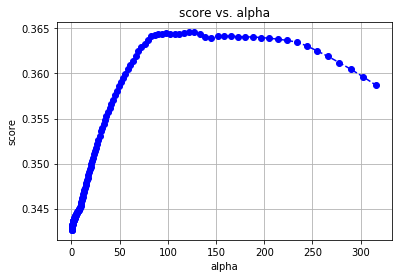

The optimaized alpha and score of Lasso linear is:  122.06107238906554 0.36457853302954246


In [31]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

lr_train, lr_validate = train_test_split(model_train1, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-0.3, 2.5, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_x, lr_train_y)
    scores[i] = lasso.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

In [34]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(model_train1_x, model_train1_y)

# lasso_f is the Lasso model (linear feature), to be tested with final test data.

Lasso(alpha=122.06107238906554, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### 2) Ploynomial features

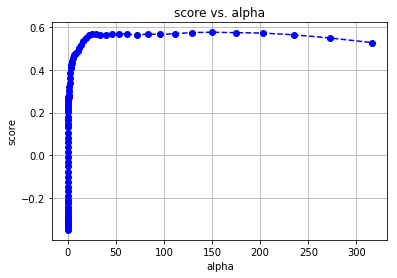

The optimaized alpha and score of Lasso polynomial is:  150.38869469554086 0.5764942758055263


In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train1, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-2.6, 2.5, num=80)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    lasso = Lasso()
    lasso.set_params(alpha = a)
    lasso.fit(lr_train_xp, lr_train_y)
    scores[i] = lasso.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        lasso_save = lasso
        
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso polynomial is: ', opt_a, max_score)

In [39]:
# combine the validate data and training data, use the optimal alpha, re-train the model
lr_train_xp = poly.fit_transform(model_train1_x)

lasso_fp = Lasso()
lasso_fp.set_params(alpha = opt_a)
lasso_fp.fit(lr_train_xp, model_train1_y)

# lasso_fp is the Lasso model (polynomial feature), to be tested with test data.

Lasso(alpha=150.38869469554086, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

### 3.1.2 Ridge linear regression
#### 1) All features are linear

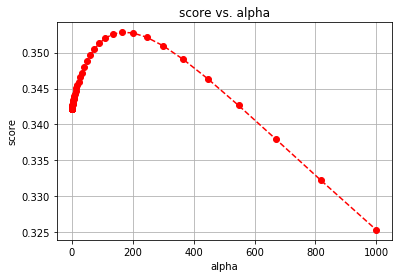

The optimaized alpha and score of Ridge linear is:  163.97026580002054 0.35284634333100795


In [42]:
# Use the same training data set as Lasso (linear features)
lr_train, lr_validate = train_test_split(model_train1, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

alphas = np.logspace (-10, 3, num=150)
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_x, lr_train_y)
    scores[i] = ridge.score(lr_validate_x, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
plt.plot(alphas, scores, color='r', linestyle='dashed', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: ', opt_a, max_score)


In [43]:
# add the 15% validate data, use the optimal alpha, re-train the model
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(model_train1_x, model_train1_y)
# ridge_f is the Ridge model (linear feature), to be tested with test data.

Ridge(alpha=163.97026580002054, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### 2) Polynomial featuers

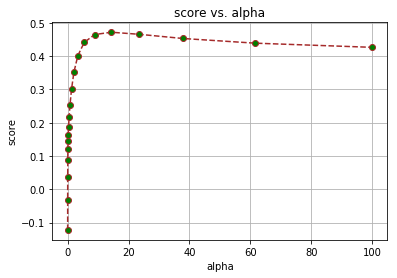

The optimaized alpha and score of Ridge polynomial is:  14.38449888287663 0.4718899469061514


In [44]:
# Use the same training data set as Lasso (polynomial features)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

lr_train, lr_validate = train_test_split(model_train1, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_validate_x = lr_validate.drop(['video_id', 'cvt_per_day'], axis = 1)
lr_train_y = lr_train['cvt_per_day']
lr_validate_y = lr_validate['cvt_per_day']

lr_train_xp = poly.fit_transform(lr_train_x)
lr_validate_xp = poly.fit_transform(lr_validate_x)

alphas = np.logspace (-2, 2, num=20)
# alphas= [1]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(lr_train_xp, lr_train_y)
    scores[i] = ridge.score(lr_validate_xp, lr_validate_y)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
        
plt.plot(alphas, scores, color='brown', linestyle='dashed', marker='o',markerfacecolor='g', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Ridge polynomial is: ', opt_a, max_score)

In [48]:
# add the 15% validate data, use the optimal alpha, re-train the model
lr_train_xp = poly.fit_transform(model_train1_x)

ridge_fp = Ridge()
ridge_fp.set_params(alpha = opt_a)
ridge_fp.fit(lr_train_xp, model_train1_y)
# ridge_fp is the Ridge model (polynomial feature), to be tested with test data.

Ridge(alpha=14.38449888287663, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

## 3.2: Non-linear model
Random forest with Gridsearch cross-validation is used. The 'mean_scores' is used to narrow down the paramenters of n_estimator (number of trees in the forest) and Max_depth (maximum depth of the tree).

### Random forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

rf_train, rf_test = train_test_split(model_train1, test_size=0.15, random_state = 0)

rf_train_x = rf_train.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_test_x = rf_test.drop(['video_id', 'cvt_per_day'], axis = 1)
rf_train_y = rf_train['cvt_per_day']
rf_test_y = rf_test['cvt_per_day']

param_grid = {
                 'n_estimators': [54, 55, 56, 57, 58, 59, 60, 62],
                 'max_depth': [12, 13, 14, 15, 16, 17]
             }

rf = RandomForestRegressor(random_state=2, max_features = 'sqrt')
grid_rf = GridSearchCV(rf, param_grid, cv=5)
grid_rf.fit(rf_train_x, rf_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [12, 13, 14, 15, 16, 

In [51]:
grid_rf.best_params_ 

{'max_depth': 14, 'n_estimators': 55}

In [52]:
grid_rf.cv_results_

{'mean_fit_time': array([0.25319991, 0.25959997, 0.25359993, 0.25399995, 0.25820003,
        0.2678    , 0.27639995, 0.27599998, 0.26280003, 0.271     ,
        0.26919999, 0.27040005, 0.2756    , 0.3072    , 0.28439999,
        0.29819999, 0.32700005, 0.28140001, 0.28340006, 0.28999996,
        0.2914    , 0.29640002, 0.30679994, 0.31139998, 0.28800001,
        0.2902    , 0.29959993, 0.30160003, 0.30619998, 0.3198    ,
        0.31799998, 0.32699995, 0.29860001, 0.30459995, 0.31020002,
        0.32119999, 0.321     , 0.32459993, 0.33019986, 0.34100003,
        0.30999999, 0.32339997, 0.3256    , 0.3315999 , 0.35239997,
        0.3421999 , 0.37720003, 0.3802    ]),
 'mean_score_time': array([0.01100011, 0.01100001, 0.01080003, 0.01100011, 0.0112    ,
        0.01159992, 0.01139998, 0.01160007, 0.01080003, 0.01160007,
        0.01199999, 0.0112    , 0.01159997, 0.0132    , 0.01199999,
        0.01200008, 0.01259995, 0.01160002, 0.01219997, 0.01200004,
        0.01199999, 0.01159997, 0.

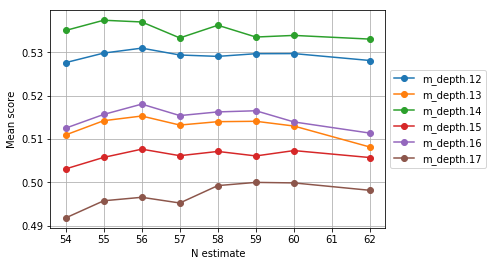

In [53]:
# plot the effect of different number of trees and maximum tree-depth druing cross validation 
scores = grid_rf.cv_results_['mean_test_score']

n_est = [54, 55, 56, 57, 58, 59, 60, 62]
m_depth=[12, 13, 14, 15, 16, 17]
scores = np.array(scores).reshape(len(m_depth), len(n_est))
fig = plt.figure()
ax = plt.subplot(111)
for ind, i in enumerate(m_depth):
    plt.plot(n_est, scores[ind], '-o', label='m_depth.' + str(i),)
    
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('N estimate')
plt.ylabel('Mean score')
plt.grid(True)
plt.show()

In [54]:
# add both training and validation data together as the new training data
rf = RandomForestRegressor(random_state=2, max_features = 'sqrt', max_depth= 14, n_estimators=55)
rf.fit(model_train1_x, model_train1_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=55,
                      n_jobs=None, oob_score=False, random_state=2, verbose=0,
                      warm_start=False)

The best rf model have n_estimator = 14, and max_depth = 55.

## Part 4: Model Evaluation
Test data is the reserved 15% of the whole dataset, and has never been seen by the above models. 

## 4.1 Lasso test with linear features (lasso_f)

In [57]:
# Lasso_f test (with linear features)

lasso_f_score = lasso_f.score(model_test1_x, model_test1_y)
pred_y = lasso_f.predict(model_test1_x)

# The mean squared error and root mean square error
MSE_lasso_f = mean_squared_error(model_test1_y, pred_y)
RMSE_lasso_f = sqrt(mean_squared_error(model_test1_y, pred_y))

print ('lasso_f score: ', lasso_f_score)
print ('Mean square error of lasso_f: ', MSE_lasso_f)
print ('Root mean squared error of lasso_f:', RMSE_lasso_f)

lasso_f score:  0.09954927178753703
Mean square error of lasso_f:  238953191.99910036
Root mean squared error of lasso_f: 15458.110880670392


## 4.2 Lasso test with polynomial features (lasso_fp)

In [60]:
# Lasso_fp test (with polynomial features)
model_test1_xp = poly.fit_transform(model_test1_x)
pred_y = lasso_fp.predict(model_test1_xp)

lasso_fp_score = lasso_fp.score(model_test1_xp, model_test1_y)
MSE_lasso_fp = mean_squared_error(model_test1_y, pred_y)
RMSE_lasso_fp = sqrt(mean_squared_error(model_test1_y, pred_y))

print ('lasso_fp score: ', lasso_fp_score)
print ('Mean square error of lasso_fp: ', MSE_lasso_fp)
print ('Root mean squared error of lasso_fp:', RMSE_lasso_fp)

lasso_fp score:  -0.0839227479482565
Mean square error of lasso_fp:  287641280.51386184
Root mean squared error of lasso_fp: 16959.99058118435


## 4.3 Ridge test with linear features (ridge_f)

In [61]:
# ridge_f test (with linear features)
ridge_f_score = ridge_f.score(model_test1_x, model_test1_y)
pred_y = ridge_f.predict(model_test1_x)

# The mean squared error and root mean square error
MSE_ridge_f = mean_squared_error(model_test1_y, pred_y)
RMSE_ridge_f = sqrt(mean_squared_error(model_test1_y, pred_y))

print ('ridge_f score: ', ridge_f_score)
print ('Mean square error of ridge_f: ', MSE_ridge_f)
print ('Root mean squared error of ridge_f:', RMSE_ridge_f)

ridge_f score:  0.11379706231843745
Mean square error of ridge_f:  235172246.61294714
Root mean squared error of ridge_f: 15335.326752728392


## 4.4 Ridge test with polynomial features (ridge_fp)

In [63]:
# ridge_fp test (with polynomial features)
model_test1_xp = poly.fit_transform(model_test1_x)

ridge_fp_score = ridge_fp.score(model_test1_xp, model_test1_y)
MSE_ridge_fp = mean_squared_error(model_test1_y, pred_y)
RMSE_ridge_fp = sqrt(mean_squared_error(model_test1_y, pred_y))

pred_y = ridge_fp.predict(model_test_xp)
print ('ridge_fp score: ', ridge_fp_score)
print ('Mean square error of ridge_fp: ', MSE_ridge_fp)
print ('Root mean squared error of ridge_fp:', RMSE_ridge_fp)

ridge_fp score:  0.38290745021826367
Mean square error of ridge_fp:  163758248.96264294
Root mean squared error of ridge_fp: 12796.80620165215


## 4.5 Random forest test (rf)

In [64]:
rf_score = rf.score(model_test1_x, model_test1_y)

pred_y = rf.predict(model_test1_x)
MSE_rf = mean_squared_error(model_test1_y, pred_y)
RMSE_rf = sqrt(MSE_rf)

# The mean squared error and root mean square error
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.5098577869271956
Mean square error of rf:  130069356.02101581
Root mean squared error of rf: 11404.79530815945


## 4.6 Comparison of the 5 models
Compared the max_score, mean squared error (MSE), and root mean squared error (RMSE) of 5 models. Random forest model rf returns the beset prediction accuracy.

No handles with labels found to put in legend.


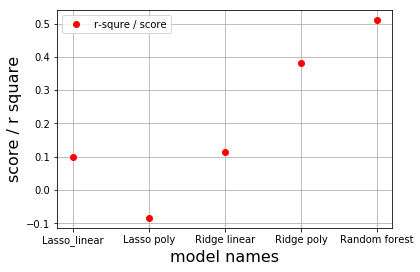

No handles with labels found to put in legend.


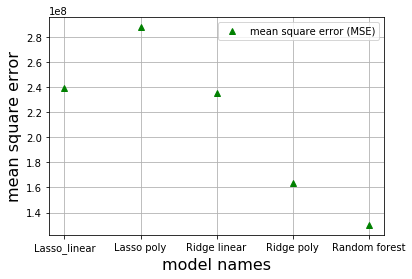

No handles with labels found to put in legend.


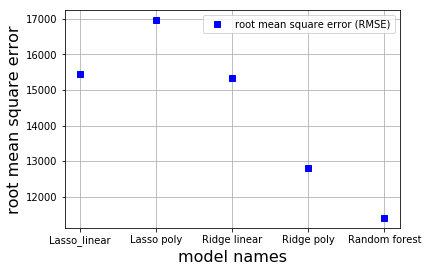

In [65]:
lst_score = [lasso_f_score, lasso_fp_score, ridge_f_score, ridge_fp_score, rf_score]
MSE_lst =  [MSE_lasso_f, MSE_lasso_fp, MSE_ridge_f, MSE_ridge_fp, MSE_rf]
RMSE_lst =  [RMSE_lasso_f, RMSE_lasso_fp, RMSE_ridge_f, RMSE_ridge_fp, RMSE_rf]
model_lst = ['Lasso_linear','Lasso poly', 'Ridge linear', 'Ridge poly', 'Random forest']

plt.figure(1)
plt.plot(model_lst, lst_score, 'ro')
plt.legend(loc = 9)
plt.legend(['r-squre / score'])
plt.xlabel('model names',fontsize =16)
plt.ylabel('score / r square', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(model_lst, MSE_lst, 'g^')
plt.legend(loc = 9)
plt.legend(['mean square error (MSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('mean square error', fontsize =16)
plt.grid(True)
plt.show()

plt.figure(3)
plt.plot(model_lst, RMSE_lst, 'bs')
plt.legend(loc = 9)
plt.legend(['root mean square error (RMSE)'])
plt.xlabel('model names', fontsize =16)
plt.ylabel('root mean square error', fontsize =16)
plt.grid(True)
plt.show()


## Part 5. Feature importance
Random forest(RF) shows the best prediction accuracy. Therefore, the feature importance will be extracted from the RF model. 

Feature importance ranking:
1. feature 2 weighted_categorical_position (0.153114)
2. feature 0 weighted_horizontal_poition (0.125979)
3. feature 1 imdb_votes (0.122217)
4. feature 7 budget (0.058824)
5. feature 8 boxoffice (0.056730)
6. feature 3 imdb_rating (0.055224)
7. feature 4 duration_in_mins (0.054734)
8. feature 6 metacritic_score (0.042676)
9. feature 9 star_category (0.039899)
10. feature 5 lionsgate (0.032440)
11. feature 11 mgm (0.027291)
12. feature 53 other (0.025557)
13. feature 10 paramount (0.020731)
14. feature 42 G (0.017618)
15. feature 28 NC-17 (0.012257)
16. feature 18 NotRated (0.011334)
17. feature 27 PG (0.010325)
18. feature 49 PG-13 (0.007859)
19. feature 52 R (0.007672)
20. feature 23 BAFTA (0.007548)
21. feature 30 Golden Globe (0.006129)
22. feature 15 Oscar (0.005517)
23. feature 29 no award (0.005429)
24. feature 51 other award (0.005089)
25. feature 17 Action (0.005000)
26. feature 50 Adventure (0.004992)
27. feature 24 Animation (0.004810)
28. feature 

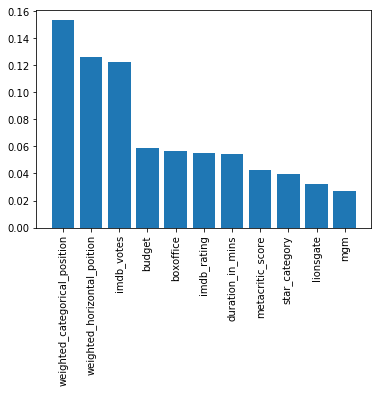

In [85]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_name = model_test1_x.columns.get_values()

# Print the feature ranking
print("Feature importance ranking:")

for f in range(model_test1_x.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f],  feature_name[f], importances[indices[f]]))
    
plt.figure(1)
plt.bar(feature_name[:11], importances[indices[:11]])
plt.xticks(rotation=90)
plt.show()